# Spam Detection Project
In the era of internet we are able to easily search for information, communicate with one another or even shop on any place on the earth with just a few strokes on the keyboard of our computer. Unfortunately, the same thing that makes our life easier, also introduces new ways on information gathering on people. The most common way to do that these days is by using 'spam' messages, email, social media accounts, ect. When 'spam' is shown to us, sometimes it looks really convincing as if it was a real product, message or email. Therefore we click on it to find out more without realising how much we revel about ourselves.

'Spam' is a huge problem in the current days of the internet. That's why we decided to try to create a program that would be able to scan through many messages, emails, etc. and detect which ones most likely fit the 'spam' profile.

**TODO: Check spelling**

#### spam data (MLP model)
At this cell we load all the necessary files and convert them.

In [1]:
import numpy as np
from toolbox.load_assets import load_spam
from toolbox.prepare_data import prepare
from toolbox.conversion import conversion
from toolbox.reshape import reshape
#-------------------------------------------------- file loading
file = "./data/spam.csv" # 'spam' used to create a dictionary
initial_train_data = "./data/train.csv" # 'spam' used for training and testing the initial model
#--------------------------------------------------::::

#--------------------------------------------------creation of 'spam' words look up dictionary
spam_dic = load_spam(file)
#--------------------------------------------------::::

#--------------------------------------------------loading and extracting data for the initial training of the model
data = prepare(initial_train_data,'spam_text','label')
text =  data[0]
labels = data[1]
#--------------------------------------------------::::

#--------------------------------------------------conversion of data arrays to np.array
text_np = np.asarray(text)
labels_np = np.asarray(labels)
#--------------------------------------------------::::

#--------------------------------------------------creation of the training data, format [[0,1,0,1...],....]
train_data_main = conversion(spam_dic, text_np)
reshape(train_data_main)
train_data_main_np = np.asarray(train_data_main)
#--------------------------------------------------::::

#--------------------------------------------------the number of features used to train the initial model
NR_FEATURES = len(train_data_main[0])

C:\Users\jakub\AppData\Local\Temp\ipykernel_4840\4204625521.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  text_np = np.asarray(text)


## MLP spam detection
Our first model is an 'MLP' classifier. In order to find out what are the bets values for our 'object' we decided to run some tests firstly.

In [2]:
from tqdm.notebook import tnrange, tqdm_notebook
import numpy as np
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.model_selection import KFold

training = KFold(n_splits=5)
result = []
# [DEBUG: Delete before submitting]
counter = 1 ##

for train_index, test_index in training.split(train_data_main, labels):
    text_train, text_test = train_data_main_np[train_index], train_data_main_np[test_index]
    labels_train, labels_test = labels_np[train_index], labels_np[test_index]
    avg = []
    test_layer = 10
    print("Processing split {}".format(counter))
    for y in tnrange(26, desc="Checking 'hidden_layers_parameter'"):
        new_learn = mlp(solver='adam',hidden_layer_sizes=test_layer, max_iter=3000)
        temp = []
        for c in range(5):
            new_learn.fit(text_train, labels_train)
            temp.append(1 - new_learn.score(text_test, labels_test))
        avg.append((test_layer, np.mean(temp)))
        test_layer += 1
    # [DEBUG: Delete before submitting]
    counter += 1 ##
    result.append(avg)

print(result)

Processing split 1


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 2


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 3


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 4


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 5


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

[[(10, 0.09147982062780269), (11, 0.09147982062780269), (12, 0.09327354260089686), (13, 0.09237668161434978), (14, 0.09327354260089686), (15, 0.09237668161434978), (16, 0.09327354260089686), (17, 0.09237668161434978), (18, 0.09147982062780269), (19, 0.09237668161434978), (20, 0.09327354260089686), (21, 0.09237668161434978), (22, 0.09237668161434978), (23, 0.09147982062780269), (24, 0.09506726457399103), (25, 0.09327354260089686), (26, 0.09417040358744395), (27, 0.09147982062780269), (28, 0.09327354260089686), (29, 0.09147982062780269), (30, 0.09147982062780269), (31, 0.09327354260089686), (32, 0.09147982062780269), (33, 0.09327354260089686), (34, 0.09147982062780269), (35, 0.09596412556053813)], [(10, 0.06905829596412552), (11, 0.06852017937219727), (12, 0.06923766816143498), (13, 0.06816143497757843), (14, 0.07031390134529145), (15, 0.06852017937219727), (16, 0.06905829596412552), (17, 0.06816143497757843), (18, 0.06905829596412552), (19, 0.06816143497757843), (20, 0.06887892376681612

Nextly we have to find out what is the optimal value for 'hidden_layer_sizes' parameter.

In [3]:
from statistics import mode
final_results = []
answer = []

# here we return all 'layers' with the smallest classification errors
for b in result:
    temp = []
    for n in range(len(b)):
        temp.append(b[n][1])
    index_val = temp.index(np.min(temp))
    final_results.append(b[index_val])

# here we take the 'layer' parameter from the pair = i, (i,np.min(temp))
for z in final_results:
    answer.append(z[0])

# here we calculate the most frequent 'layer', that has the lowest classification error
int_answer = mode(answer)
print("The best number for 'hidden_layers_sizes' parameter is: {} (int_answer)".format(int_answer))

good_model = mlp(solver='adam',hidden_layer_sizes=int_answer, max_iter=3000)
good_model.fit(train_data_main_np,labels)

print("-------------------------------------------------------------------", end="\n")
print("The accuracy of the model with 'hidden_layer_sizes'={} is {}".format(int_answer,good_model.score(train_data_main_np,labels)))



The best number for 'hidden_layers_sizes' parameter is: 10 (int_answer)
-------------------------------------------------------------------
The accuracy of the model with 'hidden_layer_sizes'=10 is 0.9226767133118048


## Checking the model
In order to check the model, we will check the 'score' on a new data set composed only of 'spam' messages.

In [4]:
from toolbox.reshape_for_model import reshape_for_model
from toolbox.external_test_data import load_external_test_data

#--------------------------------------------------data loading
test_mlp = load_external_test_data()
converted_mlp = test_mlp[0]
labels_mlp = test_mlp[1]
#--------------------------------------------------
# the result should be really close 100% mark, might not be exactly a 100% because 'spam_dic' might not contain all the words in the 'test_spam_model.csv' file
test_spam_mlp = conversion(spam_dic, converted_mlp)
reshape_for_model(test_spam_mlp, NR_FEATURES)
#--------------------------------------------------scoring of the model accuracy [new data set]

print("The accuracy of the SVC model on completely new data set = {}".format(good_model.score(np.asarray(test_spam_mlp), np.asarray(labels_mlp))))

# 'good_model' model is defined in the one cell above


The accuracy of the SVC model on completely new data set = 0.9215721464465183


# SVC spam detection
Our second model is an SVC classifier. In order to find the best values we will run some tests

In [5]:
from sklearn.svm import SVC

kernels = ['linear','poly','rbf','sigmoid']
kernel_answer = []
for x in kernels:
    clf = SVC(gamma='auto', kernel=x)
    clf.fit(train_data_main_np, labels_np)
    kernel_answer.append(clf.score(train_data_main_np, labels_np))
for y in range(len(kernels)):
    print("The score of kernel='{}' is {}".format(kernels[y], kernel_answer[y]), end="\n")

print("-----------------------------------------------------------")
index = kernel_answer.index(max(kernel_answer))
answer = kernels[index]
print("The best 'kernel' parameter: {}".format(answer))



The score of kernel='linear' is 0.9226767133118048
The score of kernel='poly' is 0.9076067456045928
The score of kernel='rbf' is 0.9221385001794044
The score of kernel='sigmoid' is 0.9210620739146035
-----------------------------------------------------------
The best 'kernel' parameter: linear


## Checking the model
In order to check the model, we will check the 'score' on a new data set composed only of 'spam' messages.

In [6]:
from sklearn.svm import SVC
from toolbox.reshape_for_model import reshape_for_model
from toolbox.external_test_data import load_external_test_data

#--------------------------------------------------data loading
test_svc = load_external_test_data()
converted_svc = test_svc[0]
labels_svc = test_svc[1]
#--------------------------------------------------creating a model
svc = SVC(gamma='auto', kernel=answer)
svc.fit(train_data_main_np, labels_np)
#--------------------------------------------------data preparation

# the result should be really close 100% mark, might not be exactly a 100% because 'spam_dic' might not contain all the words in the 'test_spam_model.csv' file
test_spam_svc = conversion(spam_dic, converted_svc)
reshape_for_model(test_spam_svc, NR_FEATURES)
#--------------------------------------------------scoring of the model accuracy [new data set]

print("The accuracy of the SVC model on completely new data set = {}".format(svc.score(np.asarray(test_spam_svc), np.asarray(labels_svc))))

The accuracy of the SVC model on completely new data set = 0.9215721464465183


# DecisionTree spam detection

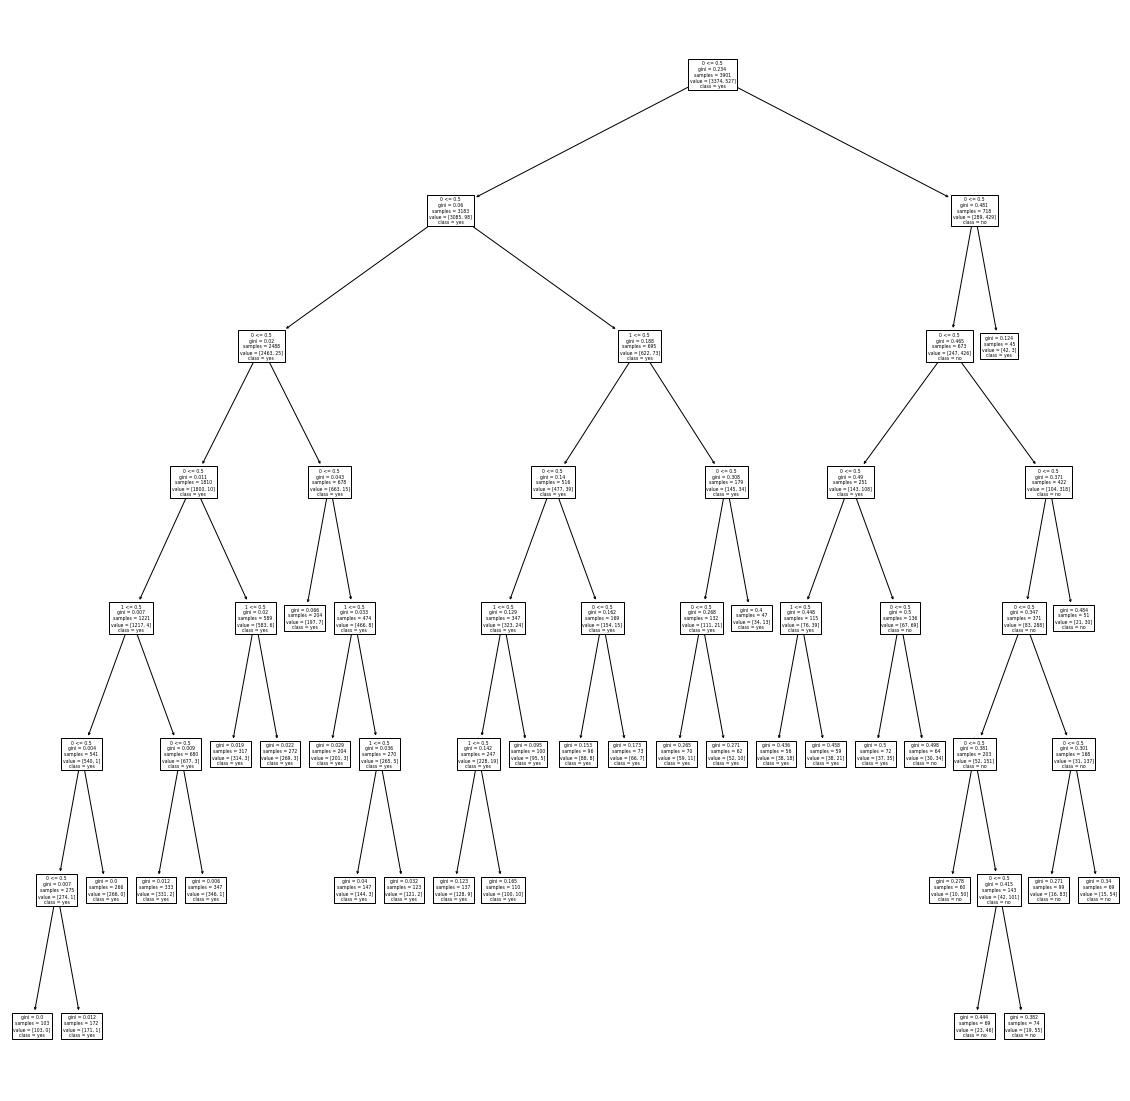

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(train_data_main_np, labels_np, test_size=0.3, random_state=100)
dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=100)
dtc = dtc.fit(X_train, y_train)

plt.figure(figsize=(20, 20))
tree.plot_tree(dtc, feature_names=labels_np,class_names=['yes','no'])
plt.show()

## Checking the model

In [8]:
from pandas import read_csv
from toolbox.reshape_for_model import reshape_for_model
from toolbox.external_test_data import load_external_test_data

#--------------------------------------------------data loading
test_tree = load_external_test_data()
converted_tree = test_tree[0]
labels_tree = test_tree[1]
#--------------------------------------------------creating a model
dtc_tree= DecisionTreeClassifier(criterion='gini',min_samples_split=100)
dtc_tree.fit(train_data_main_np, labels_np)
#--------------------------------------------------data preparation

# the result should be really close 100% mark, might not be exactly a 100% because 'spam_dic' might not contain all the words in the 'test_spam_model.csv' file
test_spam_tree = conversion(spam_dic, converted_tree)
reshape_for_model(test_spam_tree, NR_FEATURES)
#--------------------------------------------------scoring of the model accuracy [new data set]

print("The accuracy of the SVC model on completely new data set = {}".format(dtc_tree.score(np.asarray(test_spam_tree), np.asarray(labels_tree))))

The accuracy of the SVC model on completely new data set = 0.9215721464465183


In [9]:
# import numpy as np
# from toolbox.load_assets import load_spam
# from toolbox.prepare_data import prepare
# from toolbox.conversion import conversion
# from toolbox.reshape import reshape
# from sklearn.neural_network import MLPClassifier
# #------------------------------
# file = "./data/spam.csv"
# X = "./data/train.csv"
# #------------------------------
#
# spam_dic = load_spam(file)
# temp = []
#
# data = prepare(X,'spam_text','label')
# text = data[0]
# labels = data[1]
#
#
# converted_data = conversion(spam_dic, text)
# reshape(converted_data)
#
# mlp = MLPClassifier(solver='adam',hidden_layer_sizes=15,max_iter=3000)
# mlp.fit(converted_data,labels)
#
# print(mlp.score(converted_data, labels))